In [83]:
#gemi koltuk reservazyon ücreti modeli

In [84]:
#Senaryo: Bir gemi sirketinde calisiyorsunuz, sizden koltuk reservazyonu icin fiyat belirlenmesi icin bir model 
#yapmaniz istendi, burada fiyat öncelikle kullanici profiline ve sonrasinda koltuk konumunua göre belirlenecek 
# bunu yaparken titanic veri setini baz alip, yolcu profilinden, ödeme istedigini baz alan bir sistem yapabilirsiniz, 
#farkli görüsleri olan varsa onu da uygulayabilir

![stemming1.png](https://store.donanimhaber.com/50/ee/7f/50ee7fc514d6253b1d5482afde7e9e8a.png)

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# titanic veri seti 

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.shape

(891, 12)

In [88]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [92]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
df.duplicated().sum()

0

In [94]:
numerical = df.select_dtypes('number')
numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [95]:
print("Number of Uniques:\n", df.select_dtypes('number').nunique(), '\n', sep='')

Number of Uniques:
PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64



In [96]:
pd.DataFrame(df.select_dtypes('number').agg(['min', 'mean', 'median', 'max']))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1.0,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
median,446.0,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.0,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
categorical = df.select_dtypes('object')
categorical

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [98]:
print("Number of Uniques:\n", df.select_dtypes('object').nunique(),'\n', sep='')

Number of Uniques:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64



## Numerical Columns

In [99]:
numerical.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

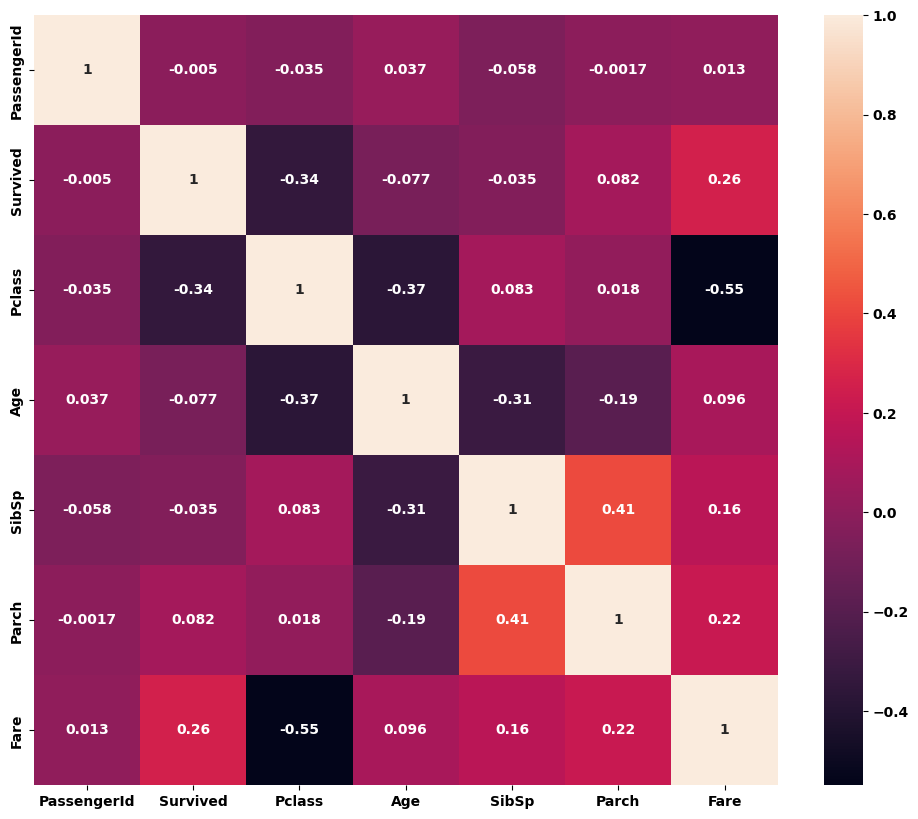

In [100]:
plt.figure(figsize=(12, 10))
sns.heatmap(numerical.corr(), annot=True);

**Fare**

In [101]:
print('Range:', np.min(df['Fare']), '-', np.max(df['Fare']))
print('---'*8)
print('Nunique:', df['Fare'].nunique())
print('---'*8)

df.Fare.describe()

Range: 0.0 - 512.3292
------------------------
Nunique: 248
------------------------


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

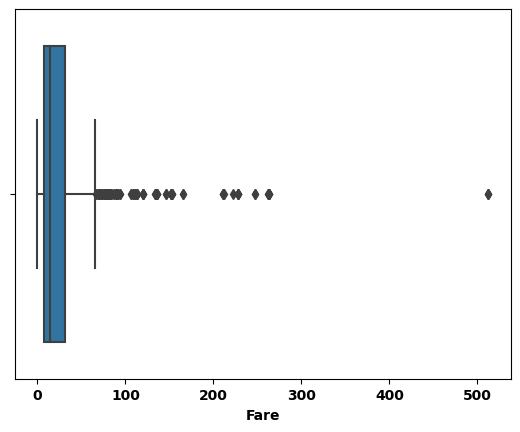

In [102]:
sns.boxplot(data = df, x = 'Fare');

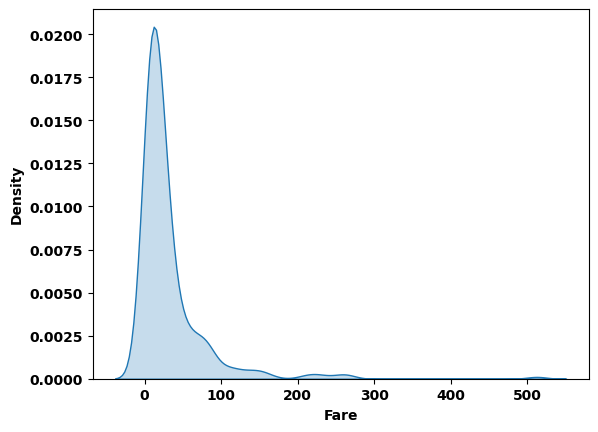

In [103]:
sns.kdeplot(data = df, x = 'Fare', fill=True);

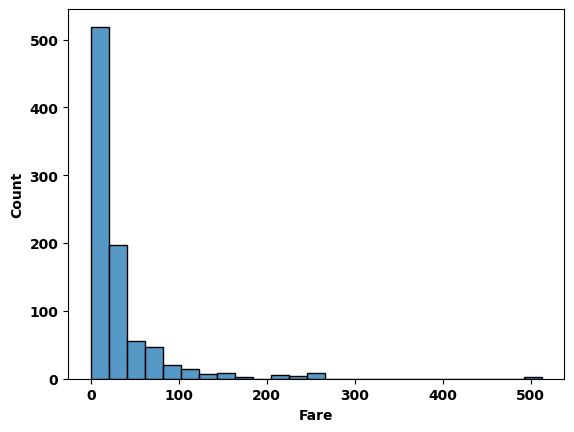

In [104]:
sns.histplot(data=df, x = 'Fare', bins=25);

**PassengerId**

In [105]:
print('Range:', np.min(df['PassengerId']), '-', np.max(df['PassengerId']))
print('---'*8)
print('Nunique:', df['PassengerId'].nunique())
print('---'*8)

df.PassengerId.describe()

Range: 1 - 891
------------------------
Nunique: 891
------------------------


count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [106]:
# 891 tane unique PassengerId var. Her yolcuya özel. Analizlerde işe yaramaz. Düşülebilir

**Survived**

In [107]:
print('Range:', np.min(df['Survived']), '-', np.max(df['Survived']))
print('---'*8)
print('Nunique:', df['Survived'].nunique())
print('---'*8)

df.Survived.describe()

Range: 0 - 1
------------------------
Nunique: 2
------------------------


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [108]:
df.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

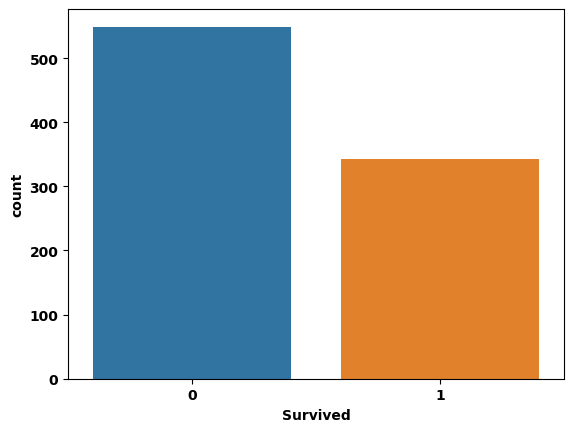

In [109]:
sns.countplot(data=df, x='Survived');

In [110]:
df.groupby('Survived')['Fare'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Survived,,,,
0,0.0,22.117887,10.5,263.0000
1,0.0,48.395408,26.0,512.3292


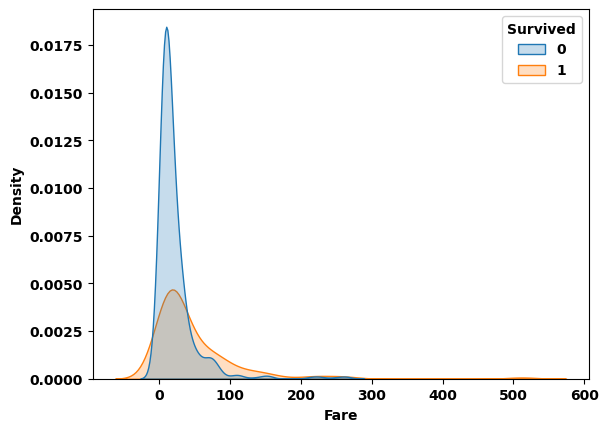

In [111]:
sns.kdeplot(data = df, x = 'Fare', hue = "Survived", fill=True);

In [112]:
# Survived sütunu bilet fiyatının belirlenmesinde önemli değil. 
# Ancak, kimler hayatta kalmış? 
# Hayatta kalma nedenlerinin belirlenmesinde anahtar sütun.
# Yukarıdaki tabloya göre yüksek bilet fiyatı ödeyenler düşük bilet bedeli ödeyenlere göre daha fazla hayatta kalmış.
# 

**Pclass**

pclass ->Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd

In [113]:
print('Range:', np.min(df['Pclass']), '-', np.max(df['Pclass']))
print('---'*8)
print('Nunique:', df['Pclass'].nunique())
print('---'*8)

df.Pclass.describe()

Range: 1 - 3
------------------------
Nunique: 3
------------------------


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [114]:
df.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

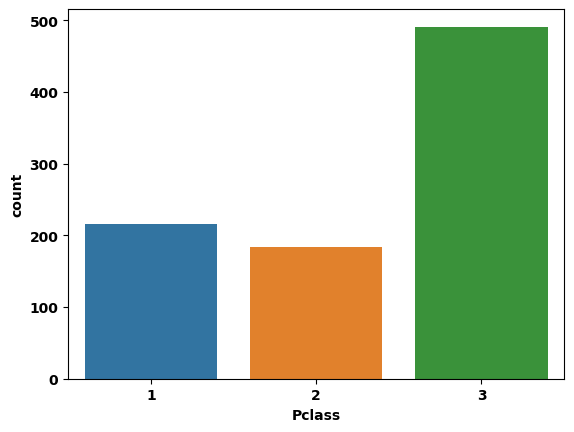

In [115]:
sns.countplot(data=df, x='Pclass');

In [116]:
df.groupby('Pclass')['Fare'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Pclass,,,,
1,0.0,84.154687,60.2875,512.3292
2,0.0,20.662183,14.2500,73.5000
3,0.0,13.675550,8.0500,69.5500


In [117]:
# Pclass bilet fiyatı belirlemesinde önemli bir sütun.
# 1'inci class ın 2'nci class a, 2'nci  class ın ise 3'üncü class a göre bilet fiyatları daha yüksek

**Age**

In [118]:
print('Range:', np.min(df['Age']), '-', np.max(df['Age']))
print('---'*8)
print('Nunique:', df['Age'].nunique())
print('---'*8)

df.Age.describe()

Range: 0.42 - 80.0
------------------------
Nunique: 88
------------------------


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [119]:
df.Age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [120]:
df.Age.isnull().sum()

177

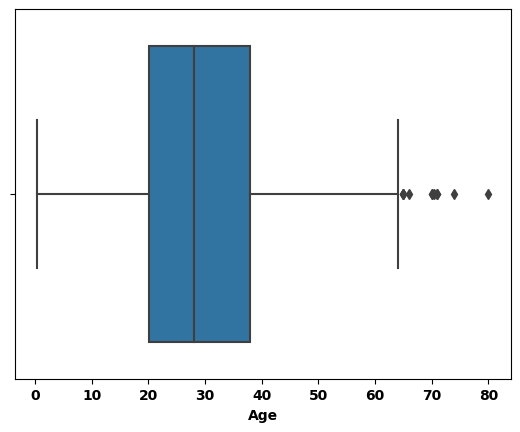

In [121]:
sns.boxplot(data = df, x = 'Age');

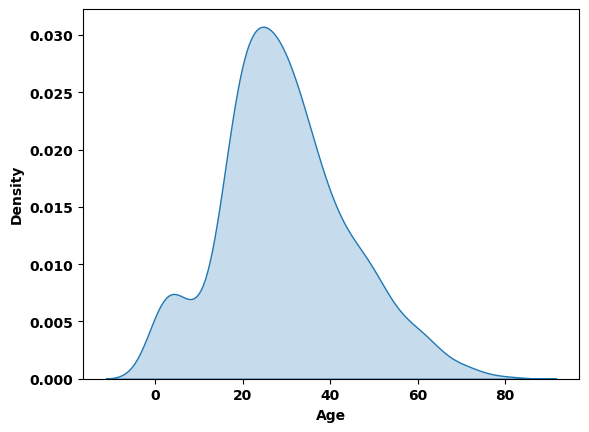

In [122]:
sns.kdeplot(data = df, x = 'Age', fill=True);

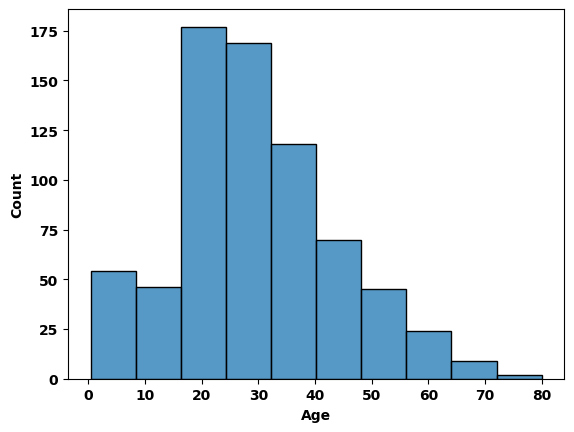

In [123]:
sns.histplot(data=df, x = 'Age', bins=10);

In [124]:
print(f'Age mean:{df.Age.mean()}')
print(f'Age median:{df.Age.median()}')

Age mean:29.69911764705882
Age median:28.0


In [125]:
df.groupby('Pclass').Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [126]:
df.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [127]:
df.groupby(['Pclass', 'Sex']).Age.transform("median")

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: Age, Length: 891, dtype: float64

In [128]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex']).Age.transform("median"))

In [129]:
np.sort(df['Age'].unique())

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 21.5 , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  ,
       27.  , 28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 ,
       33.  , 34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  ,
       40.  , 40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  ,
       47.  , 48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  ,
       55.5 , 56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  ,
       64.  , 65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

In [130]:
df['Age'].value_counts().sort_index().head(6)

0.42    1
0.67    1
0.75    2
0.83    2
0.92    1
1.00    7
Name: Age, dtype: int64

In [131]:
df['Age'].replace([0.42,0.67,0.75,0.83,0.92],[1,1,1,1,1], inplace=True)

In [132]:
df['Age'].value_counts().sort_index().head(6)

1.0    14
2.0    10
3.0     6
4.0    10
5.0     4
6.0     3
Name: Age, dtype: int64

In [133]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

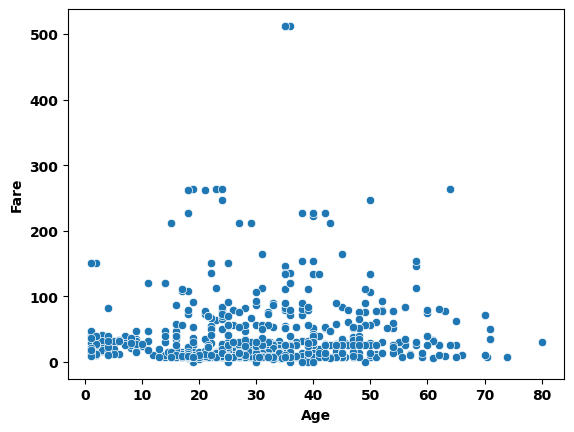

In [134]:
sns.scatterplot(data=df, x='Age', y='Fare');

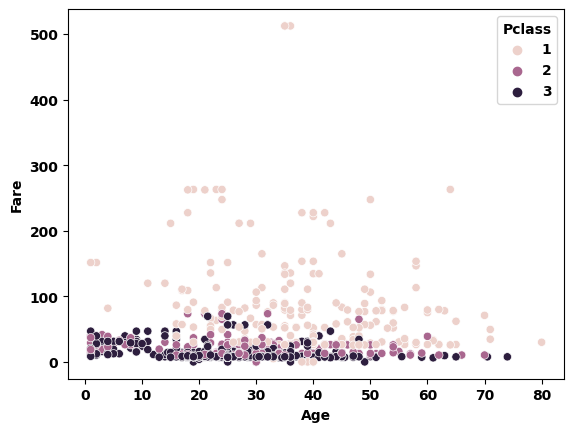

In [135]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass');

**SibSp**

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

In [136]:
print('Range:', np.min(df['SibSp']), '-', np.max(df['SibSp']))
print('---'*8)
print('Nunique:', df['SibSp'].nunique())
print('---'*8)

df.SibSp.describe()

Range: 0 - 8
------------------------
Nunique: 7
------------------------


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [137]:
df.SibSp.value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

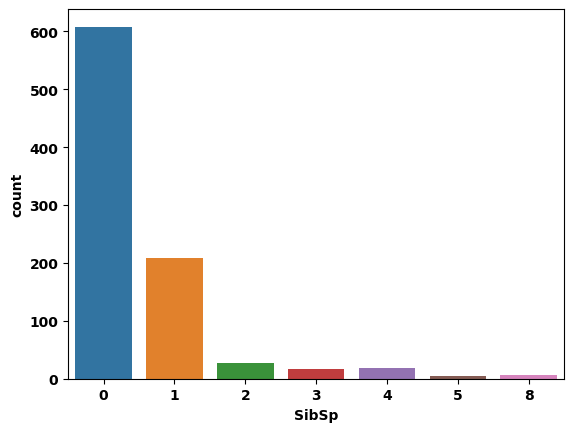

In [138]:
sns.countplot(data=df, x='SibSp');

In [139]:
df.groupby('SibSp')['Fare'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
SibSp,,,,
0,0.0000,25.692028,9.5000,512.3292
1,6.4958,44.147370,26.0000,263.0000
2,7.9250,51.753718,23.7000,262.3750
3,15.8500,68.908862,25.4667,263.0000
4,7.9250,31.855556,31.2750,39.6875
5,46.9000,46.900000,46.9000,46.9000
8,69.5500,69.550000,69.5500,69.5500


**Parch**

- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [140]:
print('Range:', np.min(df['Parch']), '-', np.max(df['Parch']))
print('---'*8)
print('Nunique:', df['Parch'].nunique())
print('---'*8)

df.Parch.describe()

Range: 0 - 6
------------------------
Nunique: 7
------------------------


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [141]:
df.Parch.value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

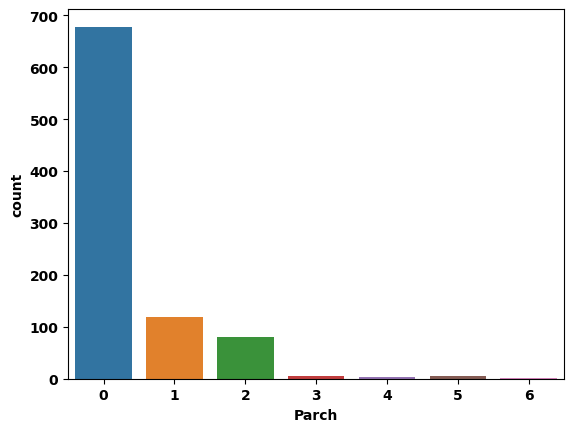

In [142]:
sns.countplot(data=df, x='Parch');

In [143]:
df.groupby('Parch')['Fare'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Parch,,,,
0,0.0000,25.586774,10.50000,512.3292
1,7.2292,46.778180,26.00000,512.3292
2,7.7500,64.337604,32.88125,263.0000
3,18.7500,25.951660,23.00000,34.3750
4,21.0750,84.968750,27.90000,263.0000
5,29.1250,32.550000,31.27500,39.6875
6,46.9000,46.900000,46.90000,46.9000


## Categorical Columns

In [144]:
categorical.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

**Sex**

In [145]:
print('Nunique:', df['Sex'].nunique())
print('---'*8)

df.Sex.value_counts(dropna=False)

Nunique: 2
------------------------


male      577
female    314
Name: Sex, dtype: int64

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


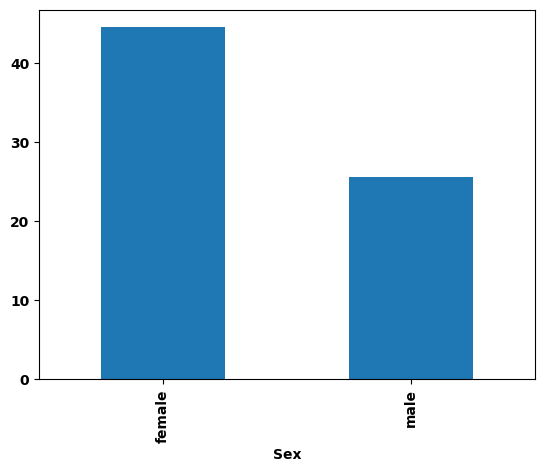

In [146]:
print(df.groupby('Sex')['Fare'].mean())
df.groupby('Sex')['Fare'].mean().plot(kind='bar');

In [147]:
df.groupby('Sex')['Fare'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Sex,,,,
female,6.75,44.479818,23.0,512.3292
male,0.00,25.523893,10.5,512.3292


**Ticket**

In [148]:
print('Nunique:', df['Ticket'].nunique())
print('---'*8)

df.Ticket.value_counts(dropna=False)

Nunique: 681
------------------------


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

**Cabin**

In [149]:
print('Nunique:', df['Cabin'].nunique())
print('---'*8)

df.Cabin.value_counts(dropna=False)

Nunique: 147
------------------------


NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [150]:
df['Cabin_V2'] = df['Cabin'].str[0]

In [151]:
df['Cabin_V2'].value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin_V2, dtype: int64

In [152]:
df.groupby('Cabin_V2')['Fare'].agg(['min', 'mean', 'median', 'max', 'nunique'])

,min,mean,median,max,nunique
Cabin_V2,,,,,
A,0.0000,39.623887,35.50000,81.8583,14
B,0.0000,113.505764,80.00000,512.3292,26
C,26.5500,100.151341,83.47500,263.0000,31
D,12.8750,57.244576,53.10000,113.2750,20
E,8.0500,46.026694,45.18125,134.5000,20
F,7.6500,18.696792,13.00000,39.0000,7
G,10.4625,13.581250,13.58125,16.7000,2
T,35.5000,35.500000,35.50000,35.5000,1


In [153]:
df.drop(['Cabin','Cabin_V2'], axis=1, inplace=True)
df.shape

(891, 11)

**Embarked**

- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [154]:
print('Nunique:', df['Embarked'].nunique())
print('---'*8)

df.Embarked.value_counts(dropna=False)

Nunique: 3
------------------------


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [155]:
df.dropna(inplace = True)
df.shape

(889, 11)

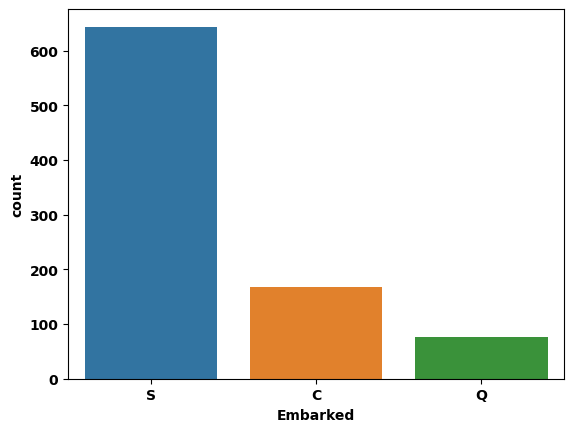

In [156]:
sns.countplot(data=df, x='Embarked');

In [157]:
df.groupby('Embarked')['Fare'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Embarked,,,,
C,4.0125,59.954144,29.70,512.3292
Q,6.7500,13.276030,7.75,90.0000
S,0.0000,27.079812,13.00,263.0000


In [158]:
df.to_csv("cleaned_titanic.csv", index=False)
pd.read_csv("cleaned_titanic.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [73]:
def calculate_fare(start_station, end_station, is_round_trip=False, is_student=False, fare_per_station=75):
    route = ['ankara', 'eskişehir', 'bilecik', 'sakarya', 'kocaeli', 'istanbul']

    try:
        start_index = route.index(start_station.lower())
        end_index = route.index(end_station.lower())

        # Calculate the number of stations traveled
        num_stations = abs(end_index - start_index)

        # Minimum fare is 75 for each shortest route
        base_fare = num_stations * fare_per_station

        # Apply a 10% discount for round-trip tickets
        round_trip_discount = 0.9 if is_round_trip else 1

        # Apply a 25% discount for students
        student_discount = 0.75 if is_student else 1

        # Calculate the final fare
        fare = base_fare * round_trip_discount * student_discount

        return fare

    except ValueError:
        # Handle cases where the entered station is not in the route
        return "Invalid station. Please enter a valid station from the route."

# Example usage:
start_station = input("Enter the starting station: ")
end_station = input("Enter the destination station: ")
round_trip_option = input("Is this a round trip? (yes/no): ").lower()
student_option = input("Is the passenger a student? (yes/no): ").lower()

is_round_trip = round_trip_option == 'yes'
is_student = student_option == 'yes'

fare_result = calculate_fare(start_station, end_station, is_round_trip, is_student)

if isinstance(fare_result, str):
    print(fare_result)
else:
    trip_type = "round trip" if is_round_trip else "one way"
    student_status = "student" if is_student else "non-student"
    print(f"The fare for the {trip_type} journey from {start_station} to {end_station} for a {student_status} is {fare_result}.")



Enter the starting station: sakarya
Enter the destination station: eskişehir
Is this a round trip? (yes/no): no
Is the passenger a student? (yes/no): yes
The fare for the one way journey from sakarya to eskişehir for a student is 112.5.


In [ ]:
# gemi koltuk reservazyon ücreti modeli

# burada fiyat öncelikle kullanici profiline
# sonrasinda koltuk konumunua göre belirlenecek 
# bunu yaparken titanic veri setini baz alip, yolcu profilinden, ödeme istedigini baz alan bir sistem yapabilirsiniz, 
#farkli görüsleri olan varsa onu da uygulayabilir

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Model için kullanılacak özelliklerin seçilmesi
features = ['Pclass', 'Sex', 'Age']

# Bağımsız değişkenlerin ve bağımlı değişkenin seçilmesi
X = df[features]
y = df['Fare']

# Kategorik değişkenleri sayısala dönüştürme (One-Hot Encoding)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Eğitim ve test veri setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin oluşturulması ve eğitilmesi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Modelin performansının değerlendirilmesi
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Kullanıcı profili ve rezervasyon bilgilerini alarak ücreti tahmin etme fonksiyonu
def predict_fare(pclass, sex, age):
    # Kullanıcı girişini modele uygun formata getirme
    input_data = {'Pclass': [pclass], 'Sex_male': [sex.lower() == 'male'], 'Age': [age]}
    input_df = pd.DataFrame(data=input_data)

    # Modeli kullanarak ücret tahmini
    fare_prediction = model.predict(input_df)
    return fare_prediction[0]

# Örnek kullanım
user_pclass = int(input("Yolcu sınıfını girin (1, 2, 3): "))
user_sex = input("Yolcu cinsiyetini girin (male/female): ")
user_age = float(input("Yolcu yaşını girin: "))

predicted_fare = predict_fare(user_pclass, user_sex, user_age)
print(f"Tahmini rezervasyon ücreti: {predicted_fare}")

Mean Absolute Error: 19.151399527452515
Yolcu sınıfını girin (1, 2, 3): 2
Yolcu cinsiyetini girin (male/female): male
Yolcu yaşını girin: 55


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
